In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


In [2]:
mergedDataPath = '../Data/mergedData23Mar.csv'
mergedData = pd.read_csv(mergedDataPath)

/var/folders/rv/l0bvb2qx7kj9z133h3zxt1040000gn/T/ipykernel_53481/3883278566.py:2: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  mergedData = pd.read_csv(mergedDataPath)


In [3]:
# Number of unique instutions in the merged data
uniqueInstitutions = mergedData['institution_id'].unique()
print('Number of unique institutions in the merged data:', len(uniqueInstitutions))
for inst in uniqueInstitutions:
    print('Institution ID:', inst, 'Number of records:', len(mergedData[mergedData['institution_id'] == inst]))

# Only considering the institution with ID: 292cff87-3c74-4e94-8622-233afb0427dd and 94a809a9-a0ef-4c47-8d96-3a5ad76f674b
mergedData = mergedData[(mergedData['institution_id'] == '292cff87-3c74-4e94-8622-233afb0427dd')]
# Dropping all the unnecessary columns: dt_accessed
# mergedData = mergedData.drop(columns=['dt_accessed', 'off_page_long'])
# Converting 'engaged' from ms to s
mergedData['engaged'] = mergedData['engaged'] / 1000

Number of unique institutions in the merged data: 10
Institution ID: 292cff87-3c74-4e94-8622-233afb0427dd Number of records: 25526
Institution ID: 2f830a93-5a14-4aff-a6e8-c7d2562e2007 Number of records: 3230
Institution ID: 97aebe75-a051-4bff-a2c0-1d53eb5d9498 Number of records: 4628
Institution ID: fc5f1b1b-2aeb-4e09-93fc-06fdac0d8030 Number of records: 1613
Institution ID: 94a809a9-a0ef-4c47-8d96-3a5ad76f674b Number of records: 7145
Institution ID: 364da48a-e0b2-4507-bc31-e7761fe16e95 Number of records: 2075
Institution ID: d2e6c885-36f4-48b9-988b-42eef1f8ed9d Number of records: 1049
Institution ID: f17495c5-e105-492d-878a-07a03ea3f805 Number of records: 1504
Institution ID: 04157183-8665-400a-925d-3bbb70ffe45e Number of records: 192
Institution ID: c699dd97-e5a4-49ce-9718-877a81b1d475 Number of records: 573


In [4]:
# Number of class IDs in the merged data
uniqueClassIDs = mergedData['class_id'].unique()
print('Number of unique class IDs in the merged data:', len(uniqueClassIDs))
# Visualising and plotting graphs for everything to do with the class IDs
for classID in uniqueClassIDs:
    print('Class ID:', classID, 'Number of records:', len(mergedData[mergedData['class_id'] == classID]))

Number of unique class IDs in the merged data: 5
Class ID: 074123e7-cd90-4500-86fe-286aaa733bf5 Number of records: 11488
Class ID: b7489f46-1d28-4c69-9901-3fb8bf9b85a6 Number of records: 2496
Class ID: 84444a0e-2905-46a8-bc93-5f566c0c1916 Number of records: 4021
Class ID: 51711479-441b-4c02-aef7-517aca63a53f Number of records: 1306
Class ID: cc1ffb2e-5555-4109-8ad8-2d49cb54ad10 Number of records: 6215


In [5]:
# Number of NaN in each column. Additional flag if 80% of data in a column is NaN
nanColumns = []
for column in mergedData.columns:
    nanCount = mergedData[column].isna().sum()
    if nanCount > 0:
        if nanCount > 0.8 * len(mergedData):
            nanColumns.append(column)
        print('Column:', column, 'Number of NaN:', nanCount)
print('Columns with more than 80% NaN:', nanColumns)
mergedData = mergedData.drop(columns=nanColumns)

Column: Cost_Response Number of NaN: 239
Column: Expectancy_Response Number of NaN: 19
Column: Intrinsic_Value_Response Number of NaN: 673
Column: Utility_Value_Response Number of NaN: 269
Column: dt_accessed Number of NaN: 1
Column: was_complete Number of NaN: 1
Column: tried_again_dt Number of NaN: 22887
Column: engaged Number of NaN: 1168
Column: idle_brief Number of NaN: 1168
Column: idle_long Number of NaN: 1168
Column: off_page_brief Number of NaN: 1168
Column: off_page_long Number of NaN: 1168
Columns with more than 80% NaN: ['tried_again_dt']


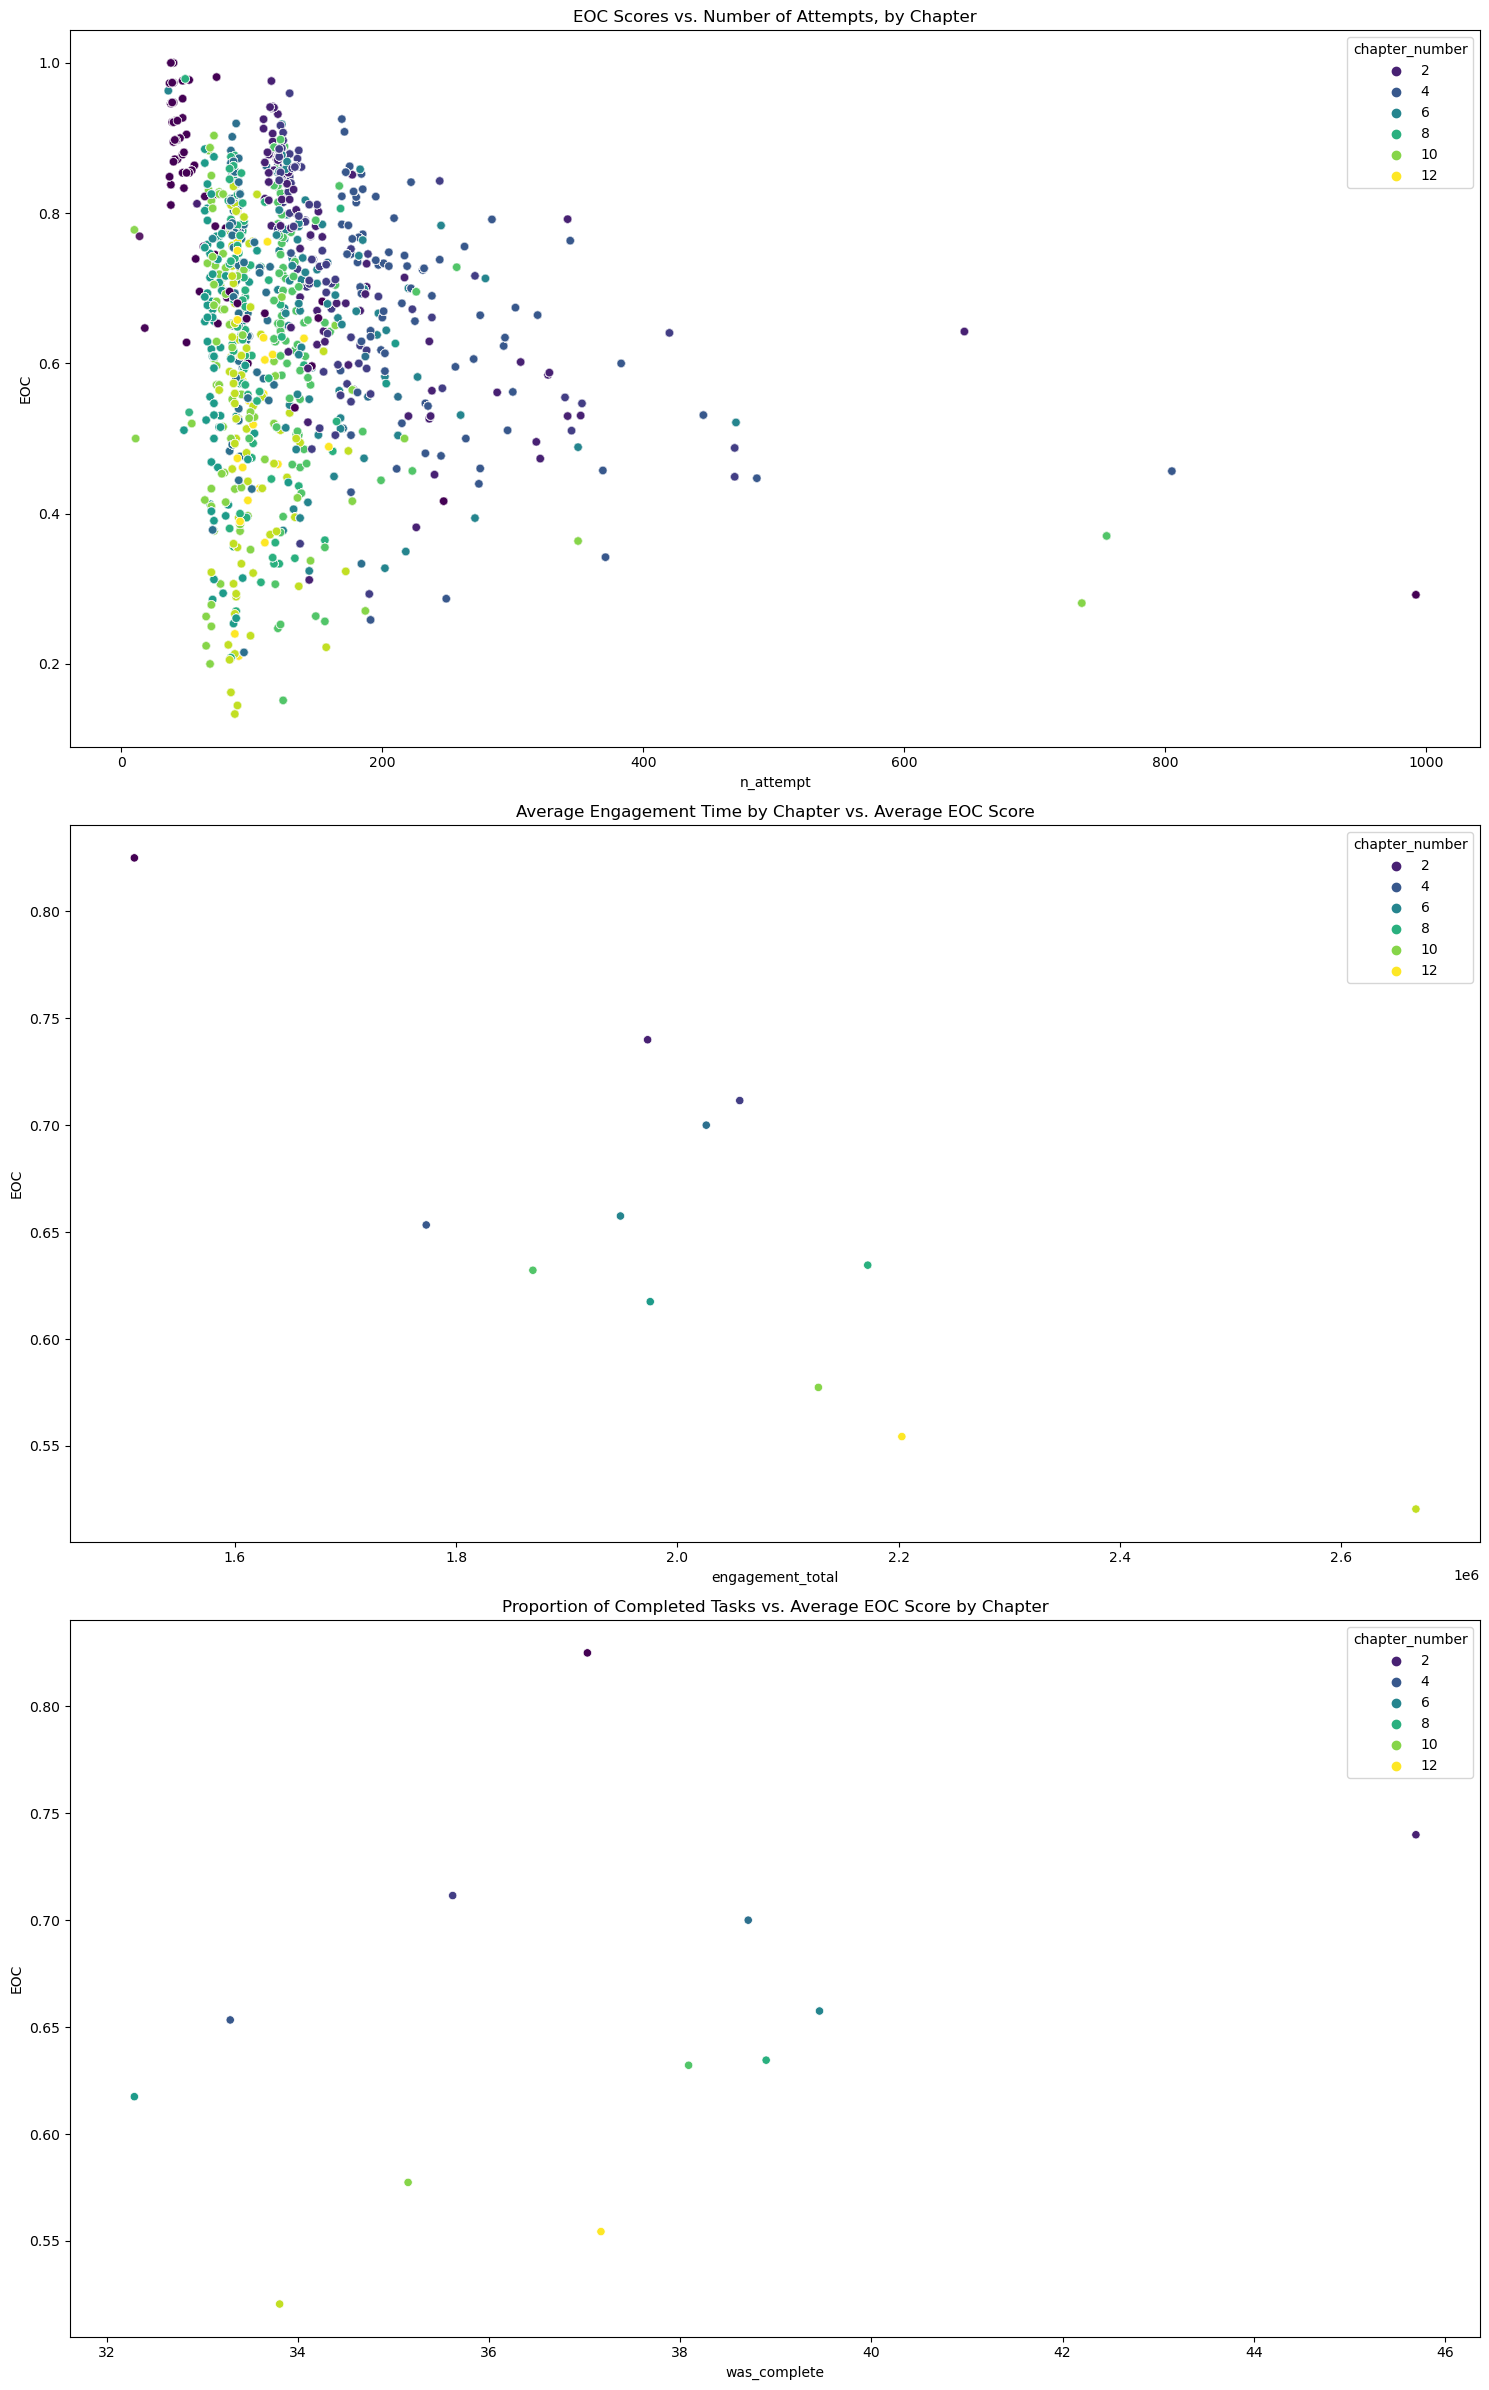

In [6]:
# Performance Analysis: EOC Scores vs. Number of Attempts, by Chapter
# Using a scatter plot with chapters as hue to visualize if there's a trend between attempts and performance across chapters.

# Engagement Analysis: Average Engagement Time by Chapter vs. Average EOC Score
# To see if there's a correlation between engagement time and performance.

# Completion and Retry Behavior: Proportion of Completed Tasks vs. Average EOC Score by Chapter
# This will help us understand if completing more tasks correlates with better performance.

# Preparing data for these analyses
mergedData['engagement_total'] = mergedData['engaged'] + mergedData['idle_brief'] + mergedData['idle_long'] + mergedData['off_page_brief'] + mergedData['off_page_long']

# Aggregating data for analysis
performance_data = mergedData.groupby('chapter_number').agg({
    'EOC': 'mean',
    'n_attempt': 'mean',
    'engagement_total': 'mean',
    'was_complete': lambda x: x.mean()*100  # converting to percentage of completion
}).reset_index()

# Plotting
fig, axs = plt.subplots(3, 1, figsize=(15, 24))

# Plot 1: EOC Scores vs. Number of Attempts, by Chapter
sns.scatterplot(x='n_attempt', y='EOC', hue='chapter_number', data=mergedData, ax=axs[0], palette='viridis', alpha=0.5)
axs[0].set_title('EOC Scores vs. Number of Attempts, by Chapter')

# Plot 2: Average Engagement Time by Chapter vs. Average EOC Score
sns.scatterplot(x='engagement_total', y='EOC', hue='chapter_number', data=performance_data, palette='viridis', ax=axs[1])
axs[1].set_title('Average Engagement Time by Chapter vs. Average EOC Score')

# Plot 3: Proportion of Completed Tasks vs. Average EOC Score by Chapter
sns.scatterplot(x='was_complete', y='EOC', hue='chapter_number', data=performance_data, palette='viridis', ax=axs[2])
axs[2].set_title('Proportion of Completed Tasks vs. Average EOC Score by Chapter')

plt.tight_layout()
plt.show()


In [7]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# Checking for missing values
missing_values = mergedData.isnull().sum()

# Feature Engineering: Adding a new feature - average performance across chapters for each student
mergedData['avg_EOC_per_student'] = mergedData.groupby('student_id')['EOC'].transform('mean')

# Selecting features for the model
features = ['chapter_number', 'n_possible', 'n_correct', 'n_attempt', 'Cost_Response', 'Expectancy_Response', 'engagement_total', 'was_complete', 'avg_EOC_per_student']
target = 'EOC'

# Preparing the data for modeling
X = mergedData[features]
y = mergedData[target]

# Encoding categorical variables and scaling numerical features
numerical_features = ['n_possible', 'n_correct', 'n_attempt', 'Cost_Response', 'Expectancy_Response', 'engagement_total', 'avg_EOC_per_student']
categorical_features = ['chapter_number', 'was_complete']

# Building the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display missing values to understand which columns need more attention
missing_values


student_id                     0
class_id                       0
chapter_number                 0
EOC                            0
n_possible                     0
n_correct                      0
n_attempt                      0
institution_id                 0
Cost_Response                239
Expectancy_Response           19
Intrinsic_Value_Response     673
Utility_Value_Response       269
section_number                 0
dt_accessed                    1
was_complete                   1
tried_again_clicks             0
engaged                     1168
idle_brief                  1168
idle_long                   1168
off_page_brief              1168
off_page_long               1168
review_flag                    0
engagement_total            1168
dtype: int64

In [8]:
# Adjusting the preprocessor to include imputation for missing values
# We will impute missing values for numerical features with their median
# and for categorical features with the most frequent category

numerical_imputer = SimpleImputer(strategy='median')
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Updating the preprocessor with imputers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[('imputer', numerical_imputer), ('scaler', StandardScaler())]), numerical_features),
        ('cat', Pipeline(steps=[('imputer', categorical_imputer), ('encoder', OneHotEncoder())]), categorical_features)
    ])

# Applying preprocessing
X_preprocessed = preprocessor.fit_transform(X)

# Splitting the preprocessed dataset into training and testing sets
X_train_preprocessed, X_test_preprocessed, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

X_train_preprocessed.shape, X_test_preprocessed.shape


((20420, 21), (5106, 21))

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train_preprocessed, y_train)

# Predicting on test set
y_pred_lr = lr_model.predict(X_test_preprocessed)

# Evaluating the Linear Regression Model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Random Forest Regressor Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_preprocessed, y_train)

# Predicting on test set
y_pred_rf = rf_model.predict(X_test_preprocessed)

# Evaluating the Random Forest Model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mse_lr, r2_lr, mse_rf, r2_rf


(0.001410009876842975,
 0.9483845102259921,
 1.7356561248713127e-07,
 0.9999936463749343)

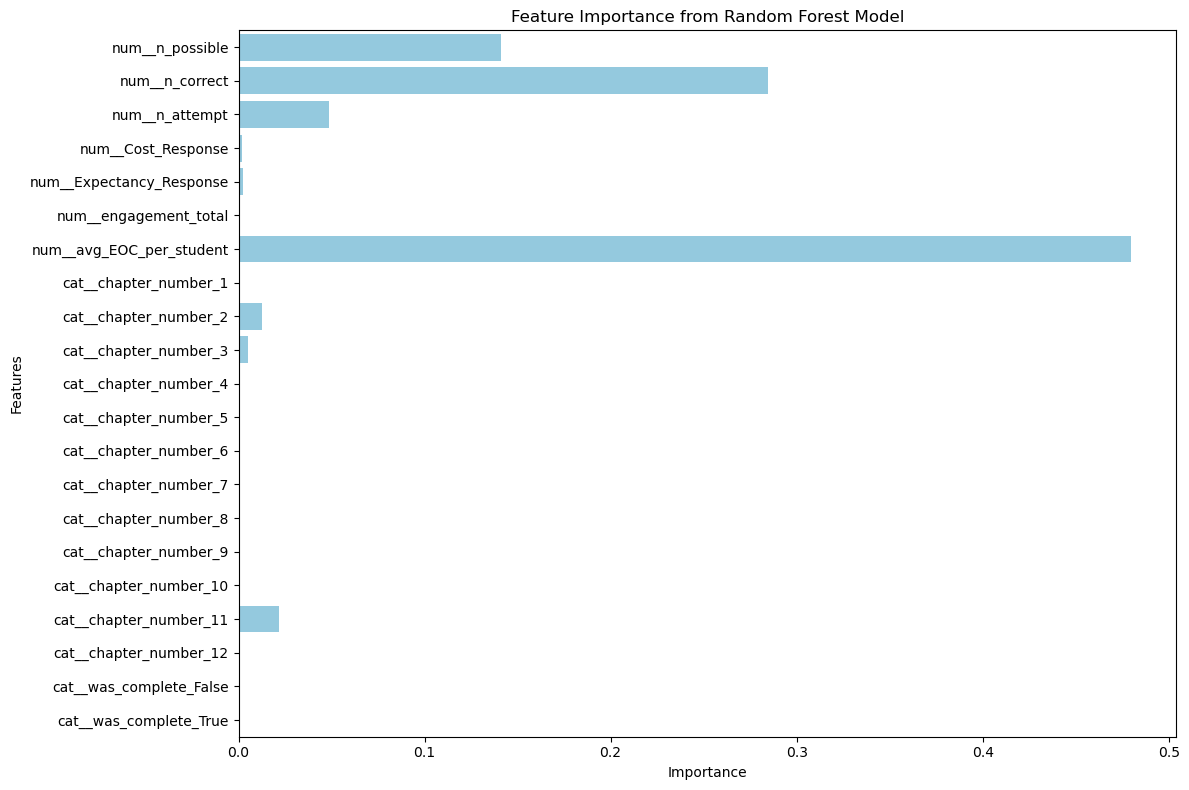

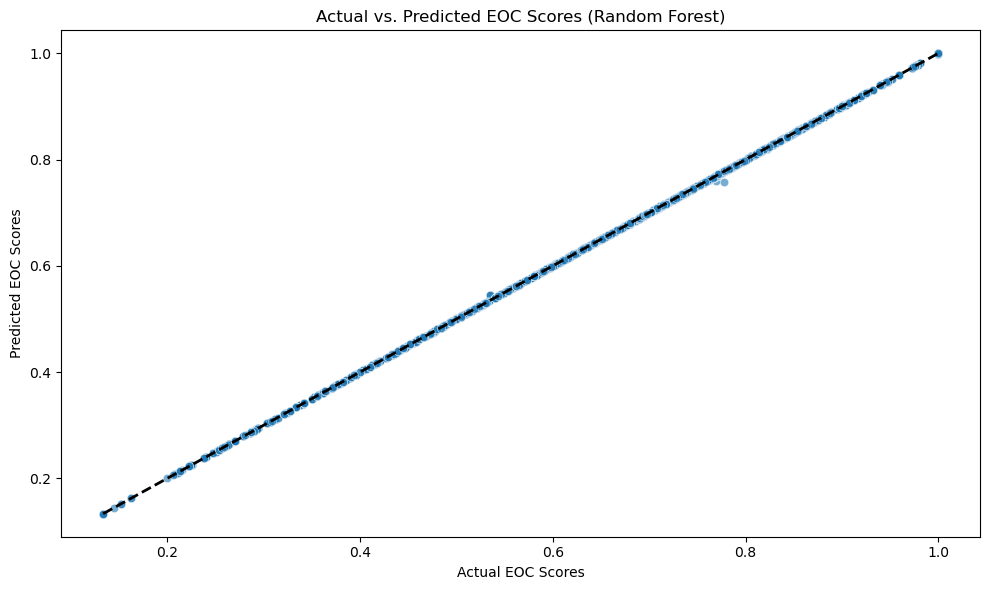

In [10]:
# Feature Importance from the Random Forest Model
feature_importances_rf = rf_model.feature_importances_
feature_names = preprocessor.get_feature_names_out()

# Plotting Feature Importances
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances_rf, y=feature_names, color='skyblue')
plt.title('Feature Importance from Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()

# Scatter Plot of Actual vs. Predicted EOC Scores for the Random Forest Model
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Line for perfect predictions
plt.title('Actual vs. Predicted EOC Scores (Random Forest)')
plt.xlabel('Actual EOC Scores')
plt.ylabel('Predicted EOC Scores')
plt.tight_layout()

plt.show()


In [11]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np

# Gradient Boosting Machine (GBM) Model
gbm_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gbm_model.fit(X_train_preprocessed, y_train)

# Predicting on test set
y_pred_gbm = gbm_model.predict(X_test_preprocessed)

# Evaluating the GBM Model
mse_gbm = mean_squared_error(y_test, y_pred_gbm)
r2_gbm = r2_score(y_test, y_pred_gbm)

# Principal Component Analysis (PCA)
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_train_pca = pca.fit_transform(X_train_preprocessed)
X_test_pca = pca.transform(X_test_preprocessed)

# Retrain GBM with PCA-transformed data
gbm_pca_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gbm_pca_model.fit(X_train_pca, y_train)
y_pred_gbm_pca = gbm_pca_model.predict(X_test_pca)
mse_gbm_pca = mean_squared_error(y_test, y_pred_gbm_pca)
r2_gbm_pca = r2_score(y_test, y_pred_gbm_pca)

# Clustering Analysis with KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_train_preprocessed)

# Correlation Analysis
corr_matrix = pd.DataFrame(X_train_preprocessed, columns=feature_names).corrwith(pd.Series(y_train))

mse_gbm, r2_gbm, mse_gbm_pca, r2_gbm_pca, corr_matrix.sort_values(key=abs, ascending=False).head(10)


/Users/arneshsaha/miniforge3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(0.00046560693621352584,
 0.9829557718356943,
 0.0007262342928927233,
 0.9734151233023507,
 cat__chapter_number_9      -0.035257
 cat__chapter_number_4       0.028422
 cat__chapter_number_8       0.023568
 cat__chapter_number_12      0.022658
 num__Cost_Response          0.022102
 cat__chapter_number_3      -0.016916
 num__Expectancy_Response   -0.016157
 num__n_attempt              0.014523
 num__n_correct             -0.012868
 num__avg_EOC_per_student   -0.011552
 dtype: float64)

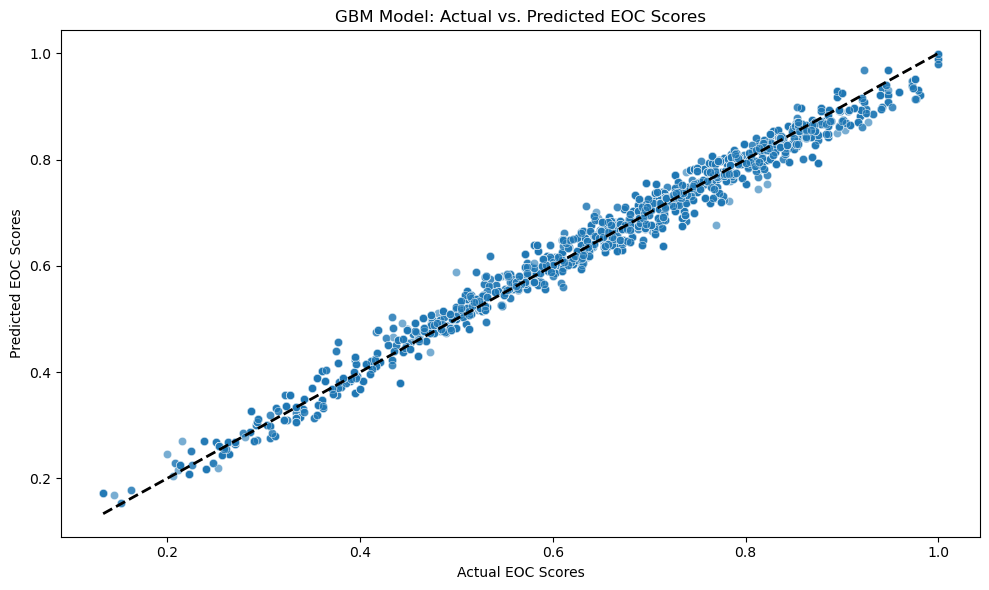

In [12]:
# GBM Model Performance Visualization: Actual vs. Predicted EOC Scores

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_gbm, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Line for perfect predictions
plt.title('GBM Model: Actual vs. Predicted EOC Scores')
plt.xlabel('Actual EOC Scores')
plt.ylabel('Predicted EOC Scores')
plt.tight_layout()

plt.show()


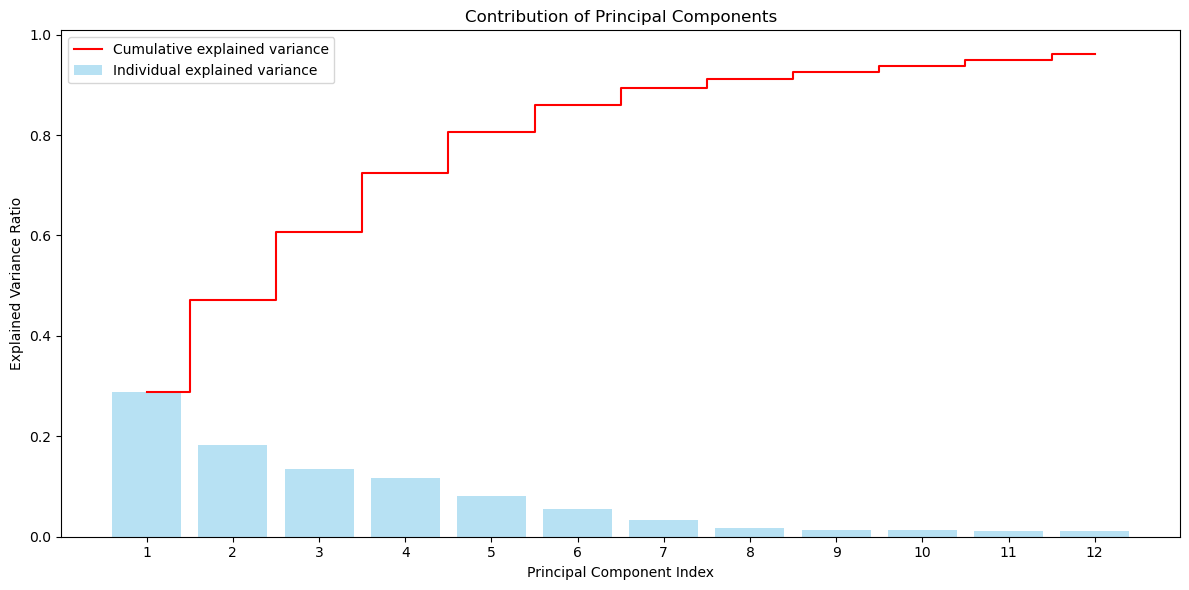

In [13]:
# PCA Components Contribution Visualization
pca_variance = pca.explained_variance_ratio_

plt.figure(figsize=(12, 6))
plt.bar(range(1, len(pca_variance) + 1), pca_variance, alpha=0.6, color='skyblue', label='Individual explained variance')
plt.step(range(1, len(pca_variance) + 1), np.cumsum(pca_variance), where='mid', label='Cumulative explained variance', color='red')
plt.xticks(range(1, len(pca_variance) + 1))
plt.xlabel('Principal Component Index')
plt.ylabel('Explained Variance Ratio')
plt.title('Contribution of Principal Components')
plt.legend(loc='best')
plt.tight_layout()

plt.show()


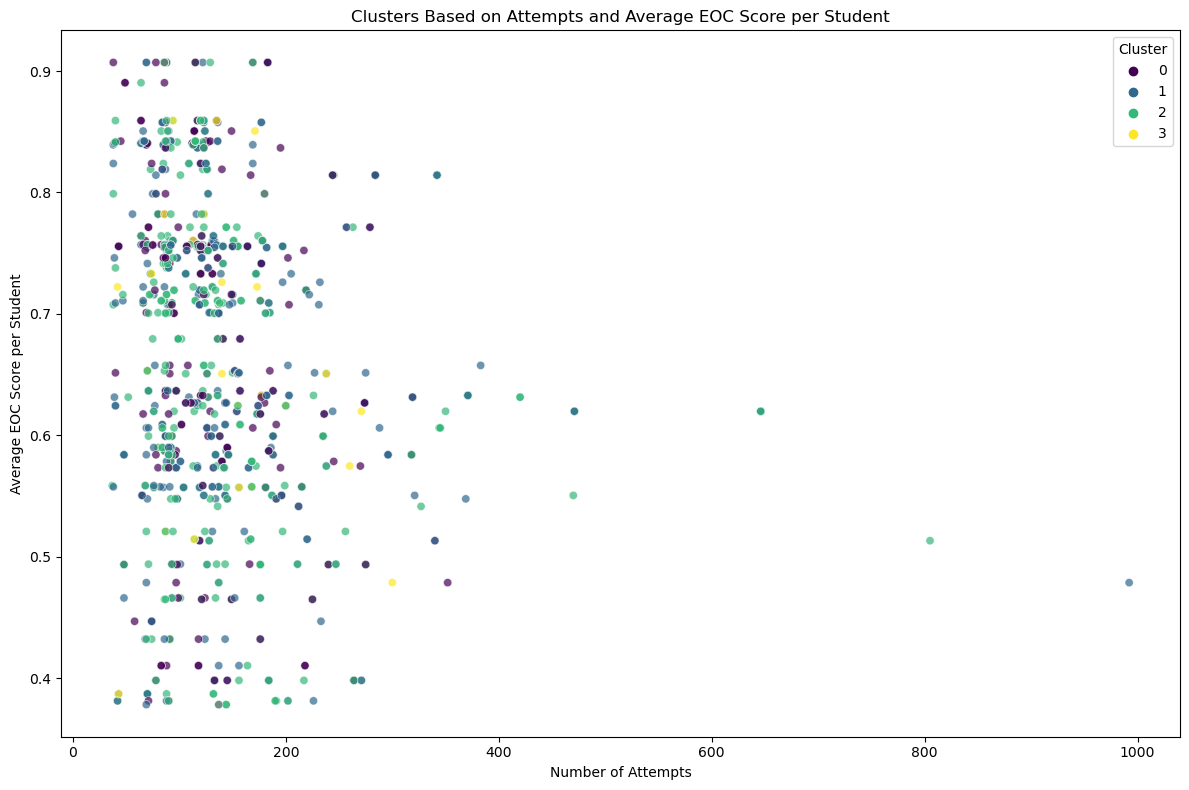

In [14]:
# Visualizing clusters based on two key features: 'n_attempt' and 'avg_EOC_per_student'
# Since the original feature space has been transformed, let's use the PCA components for visualization
# and map them back to these key features for interpretability.

# Adding cluster labels to the dataset
data_with_clusters = mergedData.copy()
data_with_clusters['Cluster'] = np.repeat(clusters, repeats=len(mergedData) // len(clusters) + 1)[:len(mergedData)]

# Selecting a subset of data for visualization to keep the plot clear and interpretable
sampled_data = data_with_clusters.sample(n=1000, random_state=42)

plt.figure(figsize=(12, 8))
sns.scatterplot(x='n_attempt', y='avg_EOC_per_student', hue='Cluster', data=sampled_data, palette='viridis', alpha=0.7)
plt.title('Clusters Based on Attempts and Average EOC Score per Student')
plt.xlabel('Number of Attempts')
plt.ylabel('Average EOC Score per Student')
plt.legend(title='Cluster')
plt.tight_layout()

plt.show()


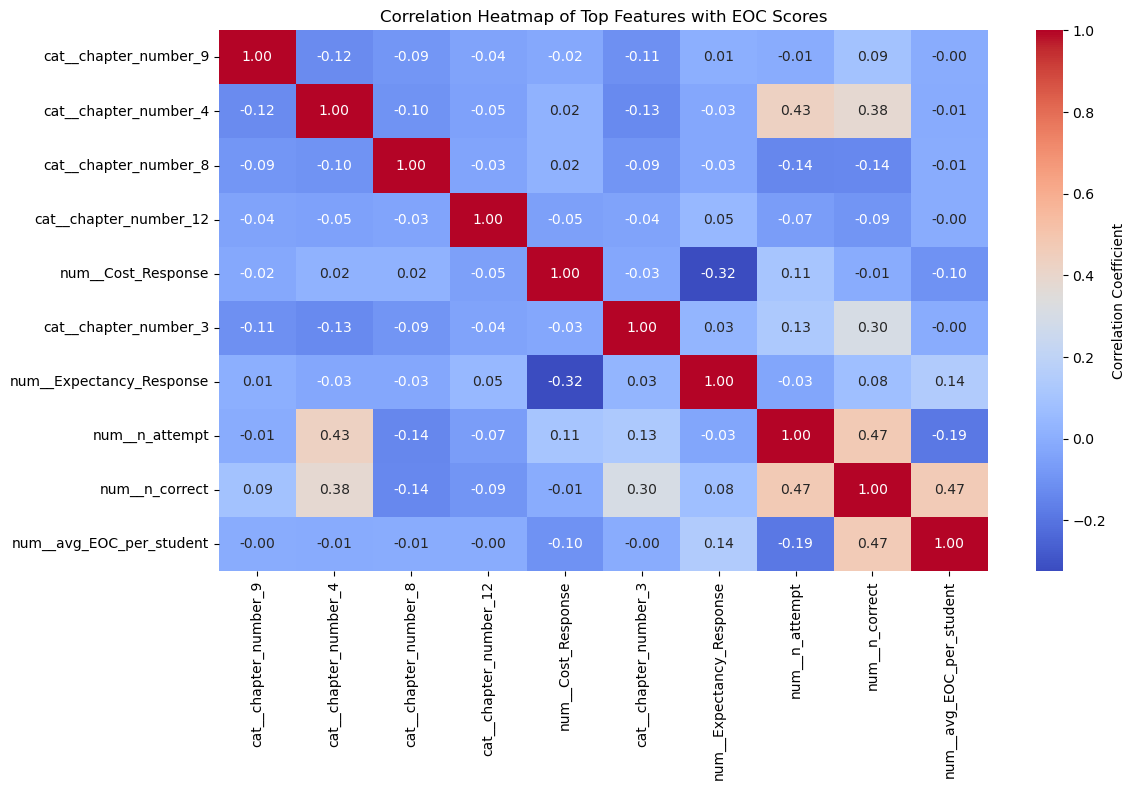

In [15]:
# Preparing a smaller correlation matrix for the top correlated features for visualization clarity
top_corr_features = corr_matrix.sort_values(key=abs, ascending=False).head(10).index
corr_matrix_top = pd.DataFrame(X_train_preprocessed, columns=feature_names)[top_corr_features].corr()

# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_top, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Heatmap of Top Features with EOC Scores')
plt.tight_layout()

plt.show()


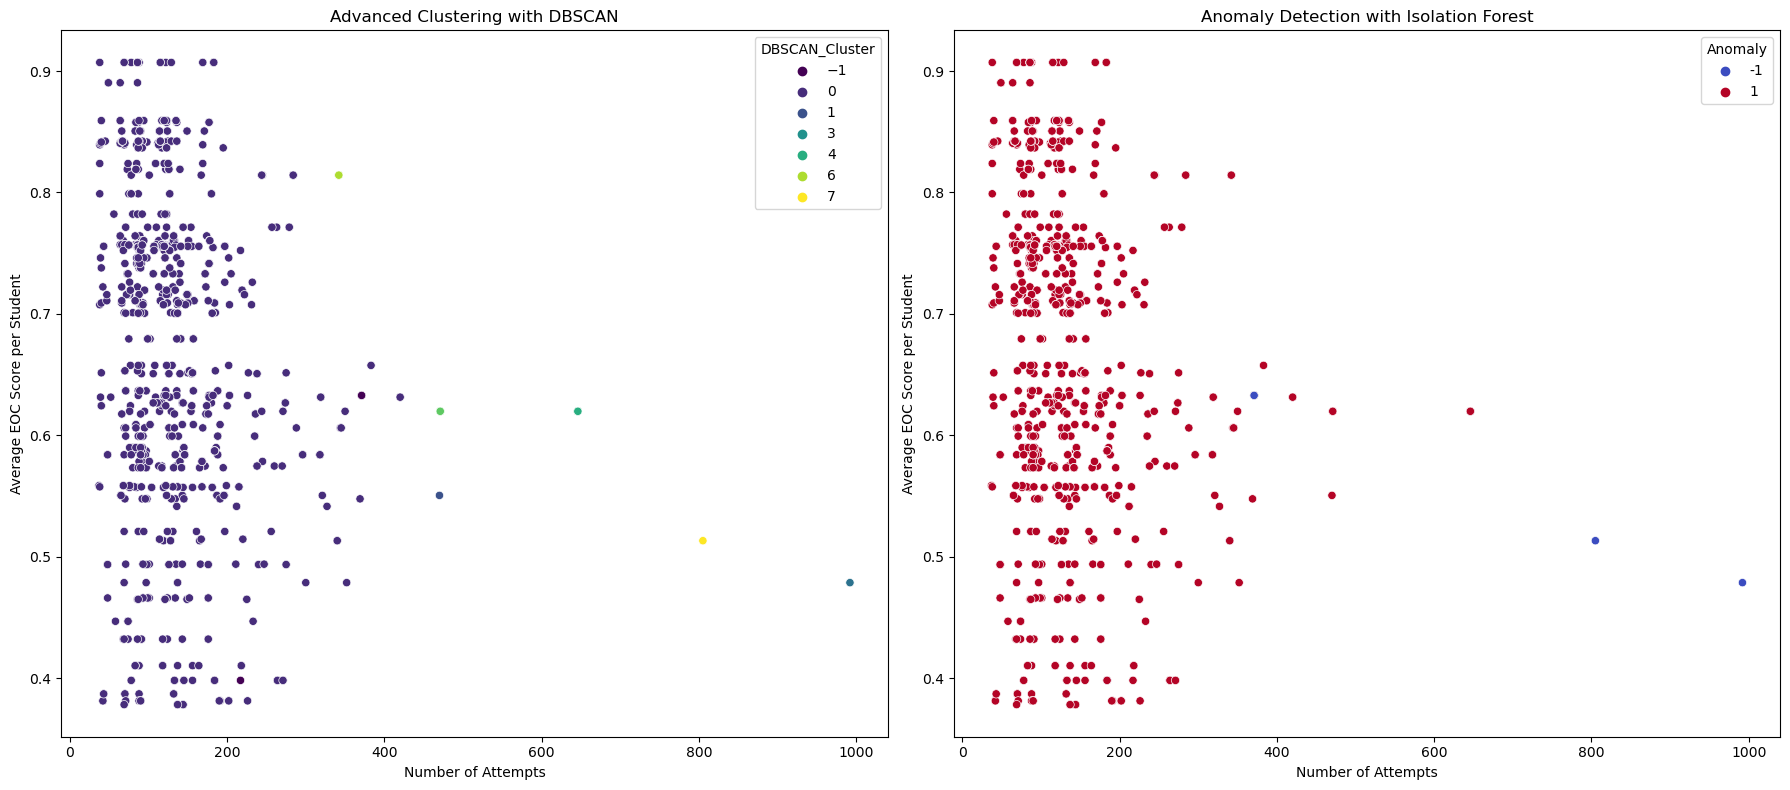

In [16]:
from sklearn.cluster import DBSCAN
from sklearn.ensemble import IsolationForest

# Advanced Clustering with DBSCAN
# Using a subset of features for clustering to focus on engagement and performance metrics
clustering_features = data_with_clusters[['n_attempt', 'avg_EOC_per_student', 'engagement_total']].fillna(0)
clustering_features_scaled = StandardScaler().fit_transform(clustering_features)

dbscan = DBSCAN(eps=0.5, min_samples=10)
clusters_dbscan = dbscan.fit_predict(clustering_features_scaled)

# Anomaly Detection with Isolation Forest
isolation_forest = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
anomalies = isolation_forest.fit_predict(clustering_features_scaled)

# Adding DBSCAN clusters and anomaly detection results to the dataframe
data_with_clusters['DBSCAN_Cluster'] = clusters_dbscan
data_with_clusters['Anomaly'] = anomalies

# Visualize the results of advanced clustering and anomaly detection
plt.figure(figsize=(18, 8))

# Advanced Clustering Visualization
plt.subplot(1, 2, 1)
sns.scatterplot(x='n_attempt', y='avg_EOC_per_student', hue='DBSCAN_Cluster', data=data_with_clusters.sample(1000, random_state=42), palette='viridis')
plt.title('Advanced Clustering with DBSCAN')
plt.xlabel('Number of Attempts')
plt.ylabel('Average EOC Score per Student')

# Anomaly Detection Visualization
plt.subplot(1, 2, 2)
sns.scatterplot(x='n_attempt', y='avg_EOC_per_student', hue='Anomaly', data=data_with_clusters.sample(1000, random_state=42), palette='coolwarm')
plt.title('Anomaly Detection with Isolation Forest')
plt.xlabel('Number of Attempts')
plt.ylabel('Average EOC Score per Student')

plt.tight_layout()
plt.show()


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = mergedData

# Assuming 'page_views' as a proxy for engagement depth; replace with your actual column
# Calculate components of the new engagement score
df['Correctness Ratio'] = df['n_correct'] / df['n_possible']
df['Attempt Penalty'] = np.log(df['n_attempt'] + 1)

# Placeholder: Replace 'page_views' with your actual engagement metric
df['Engagement Depth'] = df['engaged']  # Placeholder column

# Calculate the new engagement score with equal weighting for demonstration
weight1 = weight2 = weight3 = 1  # Adjust based on your analysis or objectives
df['New Engagement Score'] = (df['Correctness Ratio'] * weight1) + (df['Engagement Depth'] * weight2) - (df['Attempt Penalty'] * weight3)

# Summary statistics for the new engagement score
print(df['New Engagement Score'].describe())


count    24358.000000
mean       314.583647
std        541.688624
min         -5.745871
25%         15.060467
50%        130.855030
75%        426.591402
max      22602.091631
Name: New Engagement Score, dtype: float64


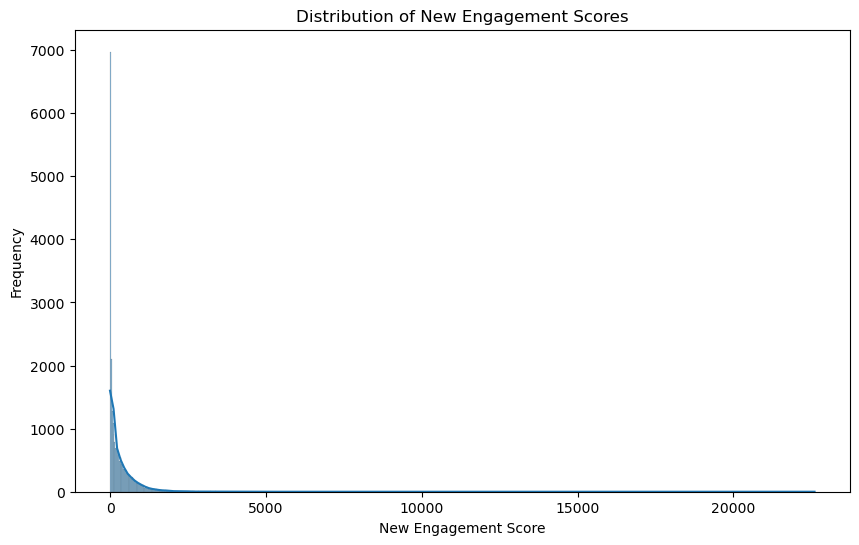

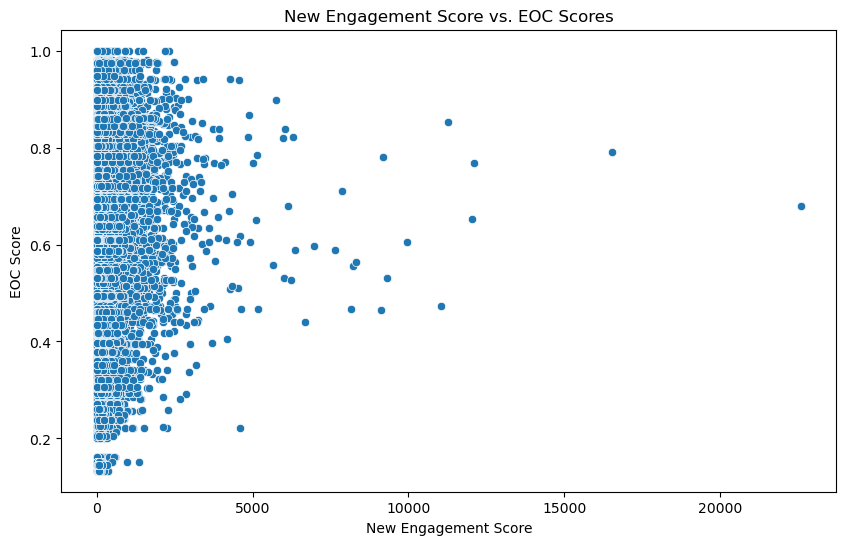

In [18]:
# Distribution of the New Engagement Score
plt.figure(figsize=(10, 6))
sns.histplot(df['New Engagement Score'], kde=True)
plt.title('Distribution of New Engagement Scores')
plt.xlabel('New Engagement Score')
plt.ylabel('Frequency')
plt.show()

# Relationship between New Engagement Score and EOC Scores
plt.figure(figsize=(10, 6))
sns.scatterplot(x='New Engagement Score', y='EOC', data=df)
plt.title('New Engagement Score vs. EOC Scores')
plt.xlabel('New Engagement Score')
plt.ylabel('EOC Score')
plt.show()


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
df = pd.read_csv('../Data/MergedData23Mar.csv')

# Assuming specific columns based on previous interactions; adjust as per your dataset
features = ['n_correct', 'n_possible', 'n_attempt', 'engaged']  # Example features
target = 'EOC'  # Example target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Preprocessing pipeline
numeric_features = ['n_correct', 'n_possible', 'n_attempt', 'engaged']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)])

X_train_prepared = preprocessor.fit_transform(X_train)
X_test_prepared = preprocessor.transform(X_test)



/var/folders/rv/l0bvb2qx7kj9z133h3zxt1040000gn/T/ipykernel_53481/421645717.py:8: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../Data/MergedData23Mar.csv')


In [20]:
from sklearn.impute import SimpleImputer

# Adjusting the numeric transformer to include imputation
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Impute with median values
    ('scaler', StandardScaler())])

# Re-defining the preprocessor with the updated numeric transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)])

# Applying the preprocessing pipeline
X_train_prepared = preprocessor.fit_transform(X_train)
X_test_prepared = preprocessor.transform(X_test)
# Continuing from the previous RandomForestRegressor setup...
rf_model.fit(X_train_prepared, y_train)
y_pred_rf = rf_model.predict(X_test_prepared)

# Evaluate the model
print("Random Forest MSE:", mean_squared_error(y_test, y_pred_rf))


Random Forest MSE: 1.2626186199185245e-06


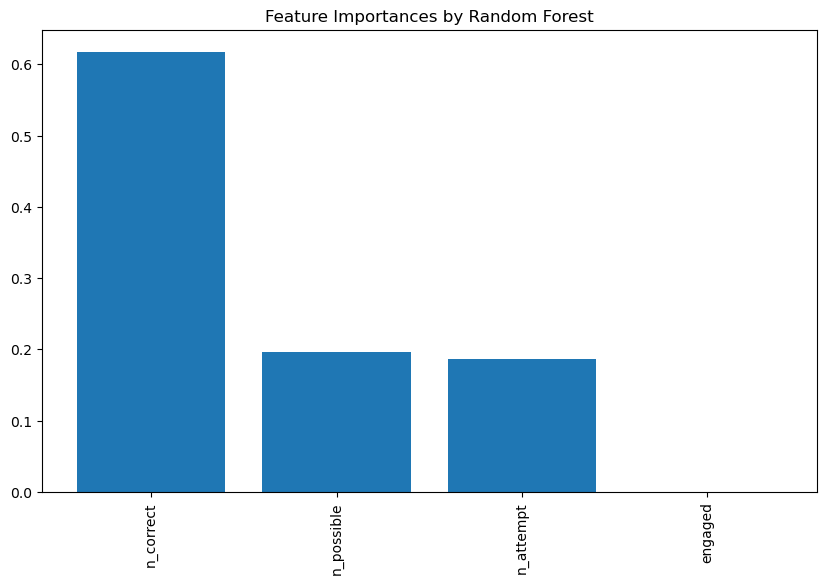

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Feature importance from Random Forest
feature_importances = rf_model.feature_importances_
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances by Random Forest")
plt.bar(range(X_train_prepared.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X_train_prepared.shape[1]), [features[i] for i in indices], rotation=90)
plt.show()


In [22]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Model loss over epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


NameError: name 'history' is not defined

<Figure size 1000x600 with 0 Axes>